In [2]:
# STEP 1: Load Dataset and Inspect Structure

import pandas as pd

# Load the dataset
df = pd.read_csv("selected_features_dataset.csv")

# Show basic info
print("Shape of the dataset:", df.shape)
print("\nColumns:")
print(df.columns.tolist())

# Quick preview
df.head()


Shape of the dataset: (144867, 11)

Columns:
['cutoff_factor', 'actual_distance_to_destination', 'segment_osrm_distance', 'segment_actual_time', 'segment_factor', 'osrm_distance', 'start_scan_to_end_scan', 'source_city', 'destination_city', 'is_cutoff', 'data']


,cutoff_factor,actual_distance_to_destination,segment_osrm_distance,segment_actual_time,segment_factor,osrm_distance,start_scan_to_end_scan,source_city,destination_city,is_cutoff,data
0,9,10.435660,11.9653,0.233333,1.272727,11.9653,1.433333,Anand_VUNagar_DC,Khambhat,1,training
1,18,18.936842,9.7590,0.166667,1.111111,21.7243,1.433333,Anand_VUNagar_DC,Khambhat,1,training
2,27,27.637279,10.8152,0.266667,2.285714,32.5395,1.433333,Anand_VUNagar_DC,Khambhat,1,training
3,36,36.118028,13.0224,0.350000,1.750000,45.5620,1.433333,Anand_VUNagar_DC,Khambhat,1,training
4,39,39.386040,3.9153,0.100000,1.200000,54.2181,1.433333,Anand_VUNagar_DC,Khambhat,0,training


In [3]:
# STEP 2: Encode Categorical Features

from sklearn.preprocessing import LabelEncoder

# Create a copy to preserve original
df_encoded = df.copy()

# Columns to encode
cat_cols = ['source_city', 'destination_city', 'data']
label_encoders = {}

# Apply label encoding
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # store encoders for possible inverse_transform


In [4]:
# STEP 3: Define Features and Target + Split

from sklearn.model_selection import train_test_split

# Target variable
y = df_encoded['segment_actual_time']

# Feature set (all except the target)
X = df_encoded.drop(columns=['segment_actual_time'])

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print shapes for confirmation
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)


Training features shape: (115893, 10)
Testing features shape: (28974, 10)


In [5]:
# STEP 4: Feature Scaling

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# STEP 5: Train Ridge Regression

from sklearn.linear_model import Ridge

# Initialize and train model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = ridge.predict(X_test_scaled)


In [7]:
# STEP 6: Evaluate Ridge Model

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# R² Score
r2 = r2_score(y_test, y_pred)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", round(r2, 4))
print("Root Mean Squared Error (RMSE):", round(rmse, 4))


R² Score: 0.4715
Root Mean Squared Error (RMSE): 0.6476


In [15]:
# Show a DataFrame of predictions vs actuals

import pandas as pd

# Compare actual and predicted values
results_df = pd.DataFrame({
    'Actual_Segment_Time': y_test.values,
    'Predicted_Segment_Time': y_pred,
    'Error': y_test.values - y_pred,
    'Absolute_Error': abs(y_test.values - y_pred)
})

# Sort by largest error (optional)
results_df_sorted = results_df.sort_values(by='Absolute_Error', ascending=False)

# Show top 10 examples
results_df_sorted.head(100)


,Actual_Segment_Time,Predicted_Segment_Time,Error,Absolute_Error
2911,33.016667,6.099875,26.916791,26.916791
19229,33.866667,7.551322,26.315345,26.315345
24240,27.166667,6.628542,20.538124,20.538124
10503,18.850000,3.695837,15.154163,15.154163
18147,18.800000,3.837545,14.962455,14.962455
...,...,...,...,...
18868,9.916667,5.314486,4.602180,4.602180
6739,7.433333,2.862336,4.570998,4.570998
23575,14.883333,10.350378,4.532955,4.532955
24701,7.016667,2.511600,4.505067,4.505067


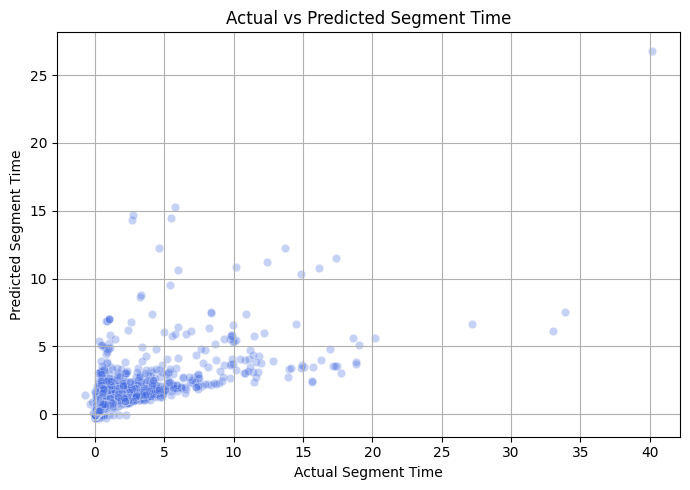

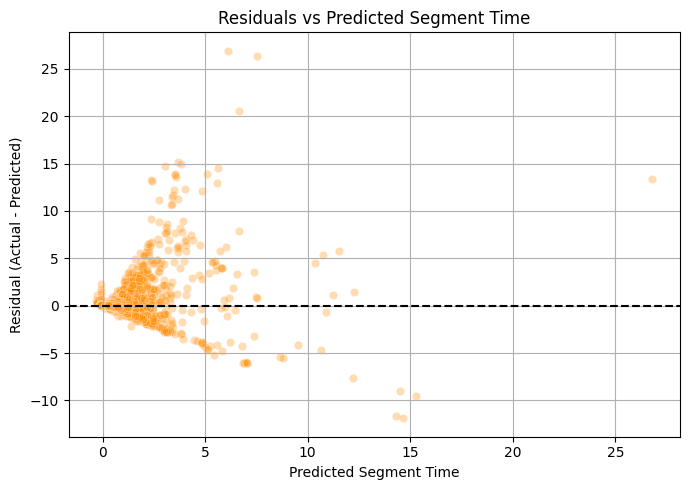

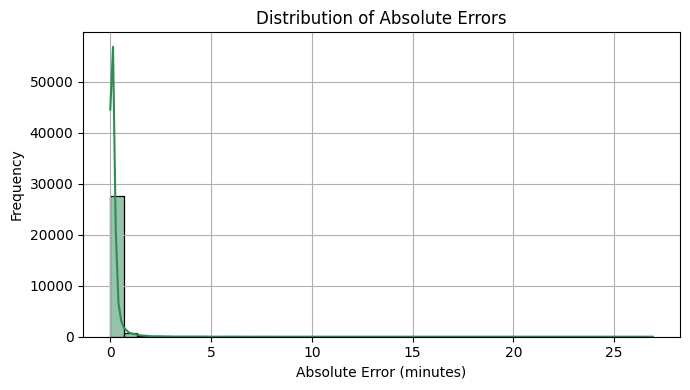

 Top 10 Segment Errors (Actual vs Predicted):


,Actual,Predicted,Error,Absolute_Error
38517,33.016667,6.099875,26.916791,26.916791
43171,33.866667,7.551322,26.315345,26.315345
79476,27.166667,6.628542,20.538124,20.538124
81136,18.850000,3.695837,15.154163,15.154163
99983,18.800000,3.837545,14.962455,14.962455
70458,17.750000,3.051245,14.698755,14.698755
38307,20.183333,5.637405,14.545928,14.545928
119714,17.450000,3.530924,13.919076,13.919076
18084,19.000000,5.099786,13.900214,13.900214
11719,17.316667,3.543016,13.773650,13.773650


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create DataFrame of predictions
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
})
results_df['Error'] = results_df['Actual'] - results_df['Predicted']
results_df['Absolute_Error'] = abs(results_df['Error'])

# 1. Scatter Plot: Actual vs Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Actual', y='Predicted', data=results_df, alpha=0.3, color='royalblue')
plt.title("Actual vs Predicted Segment Time")
plt.xlabel("Actual Segment Time")
plt.ylabel("Predicted Segment Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Residual Plot: Error vs Predicted
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Predicted', y='Error', data=results_df, alpha=0.3, color='darkorange')
plt.axhline(0, linestyle='--', color='black')
plt.title("Residuals vs Predicted Segment Time")
plt.xlabel("Predicted Segment Time")
plt.ylabel("Residual (Actual - Predicted)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram of Absolute Errors
plt.figure(figsize=(7, 4))
sns.histplot(results_df['Absolute_Error'], bins=40, kde=True, color='seagreen')
plt.title("Distribution of Absolute Errors")
plt.xlabel("Absolute Error (minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Top 10 Largest Errors
top_errors_df = results_df.sort_values(by='Absolute_Error', ascending=False).head(10)
print(" Top 10 Segment Errors (Actual vs Predicted):")
display(top_errors_df[['Actual', 'Predicted', 'Error', 'Absolute_Error']])
